In [8]:
import os
import rich
from qfoundry.agent import QFoundryAgent, NotebookGenerator
from qfoundry.agent.mock_client import MockModelClient


# Option 1: Check if the variable exists and provide a default or clear error
api_key = os.environ['QFOUNDRY_API_KEY']
if api_key is None:
    print("Warning: QFOUNDRY_API_KEY not found in environment variables.")
    
try:
    # Attempt to initialize with internal Gemini client
    agent = QFoundryAgent(api_key=api_key)
    print("Successfully connected to the QFoundry Agent.")
except Exception as e:
    print(f"Could not connect to the QFoundry Agent ({e}). Using Mock Client.")
    agent = QFoundryAgent(model_client=MockModelClient())

Successfully connected to the QFoundry Agent.


In [ ]:
user_specs= "Lets design a 17 qubit QPU based on Wallraff's paper of 2021 for error correction."

print("Asking agent for design...")
specs = agent.suggest_design(user_specs)
rich.print(specs)

Asking agent for design...


{
    'design_name': 'Wallraff_EC_17Q_Processor',
    'description': "A 17-qubit superconducting quantum processor, inspired by Wallraff's group 2021 research on 
flux-tunable transmons and fast two-qubit gates, designed for quantum error correction experiments. The qubits are 
arranged in a square-like topology with two alternating frequency families for nearest-neighbor collision 
avoidance, coupled via tunable couplers.",
    'qubit_count': 17,
    'topology_type': 'square',
    'grid_dimensions': [4, 5],
    'qubit_families': [
        {
            'family_id': 'Qubit_Family_A',
            'qubit_type': 'flux_tunable_transmon',
            'frequency_mean': 5200000000.0,
            'anharmonicity': -300000000.0,
            'asymmetry_max': 0.05,
            'charging_energy': 300000000.0,
            'drive_line': True,
            'drive_coupling': 20000000.0,
            'readout_resonator': True,
            'resonator_coupling': 10000000.0,
            'color': 0
        },
        {
            'family_id': 'Qubit_Family_B',
            'qubit_type': 'flux_tunable_transmon',
            'frequency_mean': 5700000000.0,
            'anharmonicity': -300000000.0,
            'asymmetry_max': 0.05,
            'charging_energy': 300000000.0,
            'drive_line': True,
            'drive_coupling': 20000000.0,
            'readout_resonator': True,
            'resonator_coupling': 10000000.0,
            'color': 1
        }
    ],
    'coupling_type': 'tunable_coupler',
    'coupling_strength_mean': 50000000.0,
    'coloring_strategy': 'RelaxedColoring',
    'design_guidelines': [
        'Prioritize high coherence and long qubit lifetimes for robust error correction.',
        'Enable fast, high-fidelity two-qubit gates utilizing tunable couplers, targeting < 100ns gate times.',
        'Implement a robust frequency plan using two qubit families to minimize spectral crowding and crosstalk 
between nearest neighbors.',
        'Design for efficient and high-fidelity disperser readout for all qubits, ensuring minimal 
measurement-induced dephasing.',
        'Ensure scalability considerations for potential future expansion of error correction codes or increased 
qubit count.',
        'Incorporate dedicated control lines for individual flux-tuning of both qubits and tunable couplers.'
    ]
}

In [ ]:
print("\nAsking agent for a refined layout...")
specs = agent.suggest_design("I would like the qubits to have lower freqs.")
rich.print(agent.current_spec.qubit_families)

In [10]:
print("Asking agent for layout...")
layout = agent.generate_layout(specification="")
rich.print(layout)

Asking agent for layout...


LayoutGraph(
    nodes=[
        LayoutNode(
            id='Q00',
            type='qubit',
            family_id='Qubit_Family_A',
            position=[0, 0],
            frequency=5200000000.0,
            color=0
        ),
        LayoutNode(
            id='R00',
            type='resonator',
            family_id='Qubit_Family_A',
            position=[0.2, 0.2],
            frequency=7100000000.0,
            color=0
        ),
        LayoutNode(
            id='Q01',
            type='qubit',
            family_id='Qubit_Family_B',
            position=[1, 0],
            frequency=5700000000.0,
            color=1
        ),
        LayoutNode(
            id='R01',
            type='resonator',
            family_id='Qubit_Family_B',
            position=[1.2, 0.2],
            frequency=7600000000.0,
            color=1
        ),
        LayoutNode(
            id='Q02',
            type='qubit',
            family_id='Qubit_Family_A',
            position=[2, 0],
            frequency=5200000000.0,
            color=0
        ),
        LayoutNode(
            id='R02',
            type='resonator',
            family_id='Qubit_Family_A',
            position=[2.2, 0.2],
            frequency=7150000000.0,
            color=0
        ),
        LayoutNode(
            id='Q03',
            type='qubit',
            family_id='Qubit_Family_B',
            position=[3, 0],
            frequency=5700000000.0,
            color=1
        ),
        LayoutNode(
            id='R03',
            type='resonator',
            family_id='Qubit_Family_B',
            position=[3.2, 0.2],
            frequency=7650000000.0,
            color=1
        ),
        LayoutNode(
            id='Q04',
            type='qubit',
            family_id='Qubit_Family_A',
            position=[4, 0],
            frequency=5200000000.0,
            color=0
        ),
        LayoutNode(
            id='R04',
            type='resonator',
            family_id='Qubit_Family_A',
            position=[4.2, 0.2],
            frequency=7200000000.0,
            color=0
        ),
        LayoutNode(
            id='Q05',
            type='qubit',
            family_id='Qubit_Family_B',
            position=[0, 1],
            frequency=5700000000.0,
            color=1
        ),
        LayoutNode(
            id='R05',
            type='resonator',
            family_id='Qubit_Family_B',
            position=[0.2, 1.2],
            frequency=7700000000.0,
            color=1
        ),
        LayoutNode(
            id='Q06',
            type='qubit',
            family_id='Qubit_Family_A',
            position=[1, 1],
            frequency=5200000000.0,
            color=0
        ),
        LayoutNode(
            id='R06',
            type='resonator',
            family_id='Qubit_Family_A',
            position=[1.2, 1.2],
            frequency=7250000000.0,
            color=0
        ),
        LayoutNode(
            id='Q07',
            type='qubit',
            family_id='Qubit_Family_B',
            position=[2, 1],
            frequency=5700000000.0,
            color=1
        ),
        LayoutNode(
            id='R07',
            type='resonator',
            family_id='Qubit_Family_B',
            position=[2.2, 1.2],
            frequency=7750000000.0,
            color=1
        ),
        LayoutNode(
            id='Q08',
            type='qubit',
            family_id='Qubit_Family_A',
            position=[3, 1],
            frequency=5200000000.0,
            color=0
        ),
        LayoutNode(
            id='R08',
            type='resonator',
            family_id='Qubit_Family_A',
            position=[3.2, 1.2],
            frequency=7300000000.0,
            color=0
        ),
        LayoutNode(
            id='Q09',
            type='qubit',
            family_id='Qubit_Family_B',
            position=[4, 1],
            frequency=5700000000.0,
            color=1
        ),
        LayoutNode(
       

Visualizing layout graph...


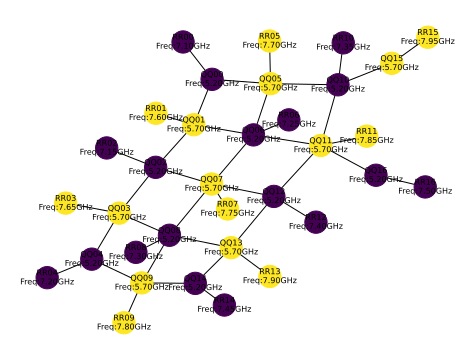

In [26]:
from rustworkx.visualization import mpl_draw
import rustworkx as rx
print("Visualizing layout graph...")
graph = agent.get_rustworkx_graph()
pos = rx.spring_layout(graph, k=0.3, seed = 2)


# get labels from layout
labels = {i: f"{node.type[0].upper()}{node.id}\nFreq:{node.frequency/1e9:.2f}GHz" for i, node in enumerate(layout.nodes)}
colors = [node.color for node in layout.nodes]

def labels_func(node):
    return f"{node.type[0].upper()}{node.id}\nFreq:{node.frequency/1e9:.2f}GHz"

mpl_draw(graph, pos= pos, with_labels=True, labels=labels_func, node_size=500, font_size=8, node_color= colors)


In [12]:
ro = agent.generate_readout_scheme()
rich.print(ro)

{
    'feedlines': {
        'lines': [
            {
                'line_id': 'Feedline_1',
                'assignments': [
                    {'qubit_id': 'Q00', 'resonator_frequency': 7100000000.0, 'coupling_strength': 15000000.0},
                    {'qubit_id': 'Q10', 'resonator_frequency': 7350000000.0, 'coupling_strength': 15000000.0},
                    {'qubit_id': 'Q05', 'resonator_frequency': 7700000000.0, 'coupling_strength': 15000000.0},
                    {'qubit_id': 'Q15', 'resonator_frequency': 7950000000.0, 'coupling_strength': 15000000.0}
                ]
            },
            {
                'line_id': 'Feedline_2',
                'assignments': [
                    {'qubit_id': 'Q06', 'resonator_frequency': 7250000000.0, 'coupling_strength': 15000000.0},
                    {'qubit_id': 'Q16', 'resonator_frequency': 7500000000.0, 'coupling_strength': 15000000.0},
                    {'qubit_id': 'Q01', 'resonator_frequency': 7600000000.0, 'coupling_strength': 15000000.0},
                    {'qubit_id': 'Q11', 'resonator_frequency': 7850000000.0, 'coupling_strength': 15000000.0}
                ]
            },
            {
                'line_id': 'Feedline_3',
                'assignments': [
                    {'qubit_id': 'Q02', 'resonator_frequency': 7150000000.0, 'coupling_strength': 15000000.0},
                    {'qubit_id': 'Q12', 'resonator_frequency': 7400000000.0, 'coupling_strength': 15000000.0},
                    {'qubit_id': 'Q07', 'resonator_frequency': 7750000000.0, 'coupling_strength': 15000000.0}
                ]
            },
            {
                'line_id': 'Feedline_4',
                'assignments': [
                    {'qubit_id': 'Q08', 'resonator_frequency': 7300000000.0, 'coupling_strength': 15000000.0},
                    {'qubit_id': 'Q03', 'resonator_frequency': 7650000000.0, 'coupling_strength': 15000000.0},
                    {'qubit_id': 'Q13', 'resonator_frequency': 7900000000.0, 'coupling_strength': 15000000.0}
                ]
            },
            {
                'line_id': 'Feedline_5',
                'assignments': [
                    {'qubit_id': 'Q04', 'resonator_frequency': 7200000000.0, 'coupling_strength': 15000000.0},
                    {'qubit_id': 'Q14', 'resonator_frequency': 7450000000.0, 'coupling_strength': 15000000.0},
                    {'qubit_id': 'Q09', 'resonator_frequency': 7800000000.0, 'coupling_strength': 15000000.0}
                ]
            }
        ],
        'multiplexing_guidelines': [
            'Qubits are grouped into 5 vertical feedlines, leveraging proximity for efficient routing.',
            'Resonator frequencies for each feedline are directly adopted from the input, as they inherently 
satisfy the >=100 MHz spacing requirement.',
            'All resonator frequencies are within the typical 7-8 GHz range.',
            'Qubit-Resonator detunings are homogeneous, ranging from 1.9 GHz to 2.3 GHz, suitable for dispersive 
readout.',
            'A uniform coupling strength of 15 MHz is assigned to all qubit-resonator pairs, falling within the 
recommended 5-20 MHz range.'
        ]
    },
    'new_layout': {
        'nodes': [
            {
                'id': 'Q00',
                'type': 'qubit',
                'family_id': 'TransmonQubit',
                'position': [0, 0],
                'frequency': 5200000000.0
            },
            {
                'id': 'R00',
                'type': 'resonator',
                'family_id': 'LambdaQuarterResonator',
                'position': [0, 0.5],
                'frequency': 7100000000.0
            },
            {
                'id': 'Q01',
                'type': 'qubit',
                'family_id': 'TransmonQubit',
                'position': [1, 0],
                'frequency': 5700000000.0
            },
            {
                'id': 'R01',
                'type': 'resonator',
                'family_

In [21]:
prompt = agent._last_query_
hist = agent.history_text()
ntok = agent.client.count_tokens(prompt + hist)
print(f'Price Gem 3: {(ntok.total_tokens/1e6*2)} $')

Price Gem 3: 0.00659 $


In [23]:
h = agent.history_text()
rich.print(prompt)

You are an expert in quantum readout multiplexing.
Given a layout of qubits (and possibly corresponding readout resonators), 
assign them to readout feedlines and determine/update resonator frequencies. Youy may update
the layout if needed to accommodate readout requirements.

Input Layout Summary:
{
  "nodes": [
    {
      "id": "Q00",
      "frequency": 5200000000.0
    },
    {
      "id": "R00",
      "frequency": 7100000000.0
    },
    {
      "id": "Q01",
      "frequency": 5700000000.0
    },
    {
      "id": "R01",
      "frequency": 7600000000.0
    },
    {
      "id": "Q02",
      "frequency": 5200000000.0
    },
    {
      "id": "R02",
      "frequency": 7150000000.0
    },
    {
      "id": "Q03",
      "frequency": 5700000000.0
    },
    {
      "id": "R03",
      "frequency": 7650000000.0
    },
    {
      "id": "Q04",
      "frequency": 5200000000.0
    },
    {
      "id": "R04",
      "frequency": 7200000000.0
    },
    {
      "id": "Q05",
      "frequency": 5700000000.0
    },
    {
      "id": "R05",
      "frequency": 7700000000.0
    },
    {
      "id": "Q06",
      "frequency": 5200000000.0
    },
    {
      "id": "R06",
      "frequency": 7250000000.0
    },
    {
      "id": "Q07",
      "frequency": 5700000000.0
    },
    {
      "id": "R07",
      "frequency": 7750000000.0
    },
    {
      "id": "Q08",
      "frequency": 5200000000.0
    },
    {
      "id": "R08",
      "frequency": 7300000000.0
    },
    {
      "id": "Q09",
      "frequency": 5700000000.0
    },
    {
      "id": "R09",
      "frequency": 7800000000.0
    },
    {
      "id": "Q10",
      "frequency": 5200000000.0
    },
    {
      "id": "R10",
      "frequency": 7350000000.0
    },
    {
      "id": "Q11",
      "frequency": 5700000000.0
    },
    {
      "id": "R11",
      "frequency": 7850000000.0
    },
    {
      "id": "Q12",
      "frequency": 5200000000.0
    },
    {
      "id": "R12",
      "frequency": 7400000000.0
    },
    {
      "id": "Q13",
      "frequency": 5700000000.0
    },
    {
      "id": "R13",
      "frequency": 7900000000.0
    },
    {
      "id": "Q14",
      "frequency": 5200000000.0
    },
    {
      "id": "R14",
      "frequency": 7450000000.0
    },
    {
      "id": "Q15",
      "frequency": 5700000000.0
    },
    {
      "id": "R15",
      "frequency": 7950000000.0
    },
    {
      "id": "Q16",
      "frequency": 5200000000.0
    },
    {
      "id": "R16",
      "frequency": 7500000000.0
    }
  ],
  "edges": [
    {
      "source": "Q00",
      "target": "R00"
    },
    {
      "source": "Q01",
      "target": "R01"
    },
    {
      "source": "Q02",
      "target": "R02"
    },
    {
      "source": "Q03",
      "target": "R03"
    },
    {
      "source": "Q04",
      "target": "R04"
    },
    {
      "source": "Q05",
      "target": "R05"
    },
    {
      "source": "Q06",
      "target": "R06"
    },
    {
      "source": "Q07",
      "target": "R07"
    },
    {
      "source": "Q08",
      "target": "R08"
    },
    {
      "source": "Q09",
      "target": "R09"
    },
    {
      "source": "Q10",
      "target": "R10"
    },
    {
      "source": "Q11",
      "target": "R11"
    },
    {
      "source": "Q12",
      "target": "R12"
    },
    {
      "source": "Q13",
      "target": "R13"
    },
    {
      "source": "Q14",
      "target": "R14"
    },
    {
      "source": "Q15",
      "target": "R15"
    },
    {
      "source": "Q16",
      "target": "R16"
    },
    {
      "source": "Q00",
      "target": "Q01"
    },
    {
      "source": "Q00",
      "target": "Q05"
    },
    {
      "source": "Q01",
      "target": "Q02"
    },
    {
      "source": "Q01",
      "target": "Q06"
    },
    {
      "source": "Q02",
      "target": "Q03"
    },
    {
      "source": "Q02",
      "target": "Q07"
    },
    {
      "source": "Q03",
      "target": "Q04"
    },
    {
      "source": "Q03",
      "target": "Q08"
    },
    {
      "source": "Q04",
      "target